# origin-destination matrix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle 

Upload data from all_routes.csv

In [2]:
#access data from csv file
all_routes = pd.read_csv('all_routes.csv', 
                    usecols = ['o', 'd', 'dist', 'dur', 'geom'], 
                    dtype = {'dist':float, 'dur':float},
                    converters={'geom': eval})
    #la lista 'geom' viene scritta nel file csv sotto forma di stringa
    #converters={'geom': eval} la converte in pandas series

all_routes.head(5)                


 

,o,d,dist,dur,geom
0,TS1,TS_P,10.56,747.0,"[[13.767103, 45.650613], [13.76746, 45.650831]..."
1,TS1,TS_B,10.14,814.9,"[[13.767103, 45.650613], [13.76746, 45.650831]..."
2,TS1,UD_FI,71.04,3225.1,"[[13.767103, 45.650613], [13.76746, 45.650831]..."
3,TS1,UD_C,73.27,3299.5,"[[13.767103, 45.650613], [13.76746, 45.650831]..."
4,TS1,UD_S,76.67,3435.6,"[[13.767103, 45.650613], [13.76746, 45.650831]..."


In [3]:
# # access to waypoints of each route
# nroutes:int = all_routes.shape[0]
# nroutes:int = 3 # limit the number of routes for debug
# for r in range (nroutes):
#     nwp = len(all_routes.geom[r])
#     nwp = 5 # limit the number of point for debug
#     for wp in range (nwp):
#         coords = all_routes.geom[r][wp]
#         print(r,wp, coords)


Plot origins and destinations

<function matplotlib.pyplot.show(close=None, block=None)>

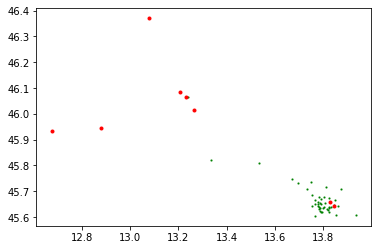

In [4]:
nroutes:int = all_routes.shape[0]   # number of routes
origx:list = []
origy:list = []
destx:list = []
desty:list = []

for r in range (nroutes):            
    x = all_routes.geom[r][0][0]
    y = all_routes.geom[r][0][1]
    if x not in origx:
        origx.append(x)
    if y not in origy:
        origy.append(y)
    
    nwp = len(all_routes.geom[r])   # number of waypoints in each route
    x = all_routes.geom[r][nwp-1][0]
    y = all_routes.geom[r][nwp-1][1]
    if x not in destx:
        destx.append(x)
    if y not in desty:
        desty.append(y)

plt.plot(origx,origy, marker='s', markersize = 1, color='green', linewidth = 0)
plt.plot(destx,desty, marker='o', markersize = 3, color='red', linewidth = 0)
plt.legend
plt.show


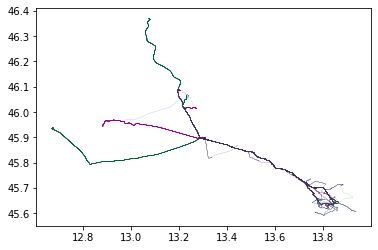

In [5]:

nroutes:int = all_routes.shape[0]
cycol = cycle('bgrcmk') 
for r in range (nroutes):
    coords = all_routes.geom[r]
    x,y = map(list,zip(*coords))
    plt.plot(x,y,  markersize = 0, c=next(cycol), linestyle = 'solid', linewidth=.1)
    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

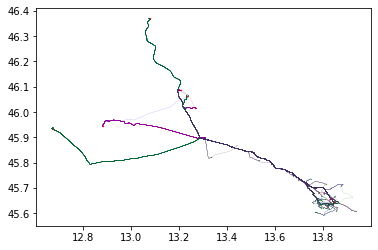

In [6]:
# TODO 
nroutes:int = all_routes.shape[0]
cycol = cycle('bgrcmk') 
for r in range (nroutes):
    coords = all_routes.geom[r]
    x,y = map(list,zip(*coords))
    plt.plot(x,y,  markersize = 0, c=next(cycol), linestyle = 'solid', linewidth=.1)
    plt.show

plt.plot(origx,origy, marker='s', markersize = .2, color='green', linewidth = 0)
plt.plot(destx,desty, marker='o', markersize = .5, color='red', linewidth = 0)

    
plt.legend
plt.show


export to geo json

https://github.com/gboeing/ppd599/blob/3faf7e028d48cb03ddb999c5a910213c5384e7dc/17-Leaflet-Web-Mapping/leaflet-simple-demo/pandas-to-geojson.ipynb

In [12]:
import json
all_routes.to_json('data.json', orient = "index")